In [1]:
import os
import sys
import torch
from timeit import default_timer as timer
from datetime import timedelta

BASE_DIR = os.path.dirname('./')
ROOT_DIR = os.path.dirname(BASE_DIR)
sys.path.append(ROOT_DIR)

import yaml

from lib.common.helpers.dataloader_helper import build_dataloader
from lib.common.helpers.model_helper import build_model
from lib.common.helpers.visualization_helper import visualization
from lib.common.helpers.print_helper import PrintHelper

In [2]:
mode = 'test' # test, eval, train
config = 'configs/kitti.yaml'
from lib.monoLSS.printer import Printer

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# load cfg
assert (os.path.exists(config))
cfg = yaml.load(open(config, 'r'), Loader=yaml.Loader)
  
#  build dataloader
dataset = build_dataloader(cfg['dataset'], mode)

# build model
model = build_model(cfg['model'])

printHelper = PrintHelper(dataset)
printer = Printer(cfg['model'], model)


Using device: cuda


In [3]:
idx = 0


2
[['Car', 0, 0, 1.8179247, 332.36948, 202.73111, 436.6641, 269.63275, 1.4520884, 1.5795168, 3.6816363, -5.5747733, 2.2304585, 18.13659, 1.5155929, 0.954242], ['Car', 0, 0, 1.7808565, 404.08896, 199.92766, 478.233, 251.49828, 1.389002, 1.5166918, 3.478317, -5.250478, 2.2863805, 22.580303, 1.5515726, 0.8453927], ['Car', 0, 0, 1.7368981, 441.89478, 194.28929, 498.6535, 236.56122, 1.4508096, 1.5636353, 3.747396, -5.4402423, 2.3143308, 28.187937, 1.5462042, 0.7033465], ['Car', 0, 0, -0.46634537, 772.3376, 170.89445, 1126.3208, 296.0801, 1.5135385, 1.6699773, 4.3621707, 4.607347, 1.5508099, 10.281764, -0.026250131, 0.6718422], ['Car', 0, 0, 1.734753, 474.60785, 194.76338, 520.64734, 226.8239, 1.3880911, 1.5872431, 3.9142354, -5.3653646, 2.44627, 34.538937, 1.5808502, 0.47264066], ['Car', 0, 0, 0.053748704, 640.42847, 178.14113, 697.939, 201.93138, 1.5300679, 1.5774298, 3.768654, 3.9980917, 1.8690013, 48.828293, 0.13619657, 0.26025718]]
0:00:00.050231


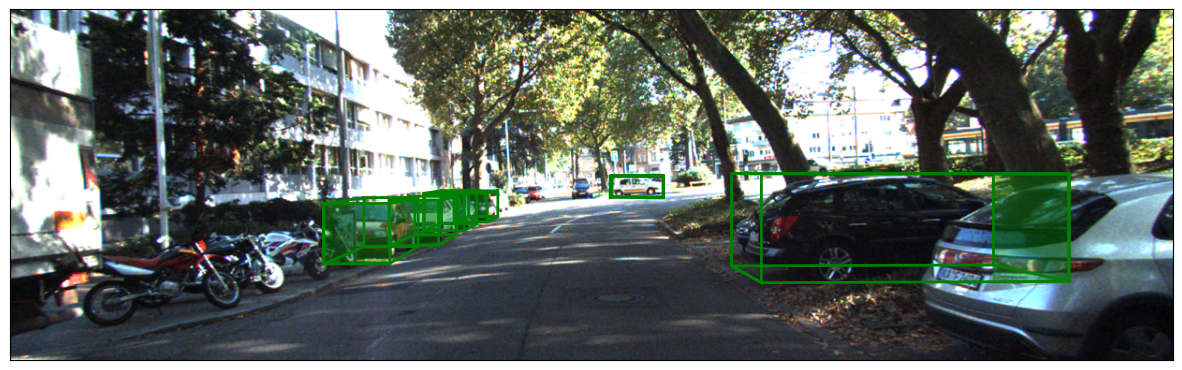

In [6]:
print(idx)

for x in range(1):
    img, calibs = printHelper.getPrintables(idx)
    
    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    start_time = timer()

    preds = printer.print(img, calibs)
    print(preds)

    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    end_time = timer()
    print(timedelta(seconds=end_time - start_time))
    
    visualization(img, calibs, preds, False)
    idx = idx +1